# The EDA case study analysis 


### EDA covers 
1.Data Understanding
2.Data Cleaning
3.Explore data relationships
4.Identification and creation of features

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # if there are any warning, it will be ignored

pd.set_option('display.max_rows', None) # display all rows 
pd.set_option('display.max_columns', None) # display all columns


In [2]:
Application_df= pd.read_csv(r'C:\Users\Jaikrish\Documents\Python Scripts\EDA\credit\application_data.csv')


In [3]:
Application_df.shape # To Return shape (Rows, columns) of dataframe

(307511, 122)

In [4]:
#Looking at all the Column names
Application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
Application_df.describe(include = 'all')# To get a summary of all the columns when the dataframe has mixed column types

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
Application_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


There are 307511 rows and 122 columns in the dataset, it is very difficult to look at each column one by one and digout NA values so, we find out all columns where missing values are more than 30%. We will remove those columns as it is not feasable to impute missing values for those columns.

In [7]:
Application_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [8]:
# The percentage of missing values
round((Application_df.isna().sum()*100)/Application_df.shape[0], 2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

Number of columns having null value more than 30%= 50


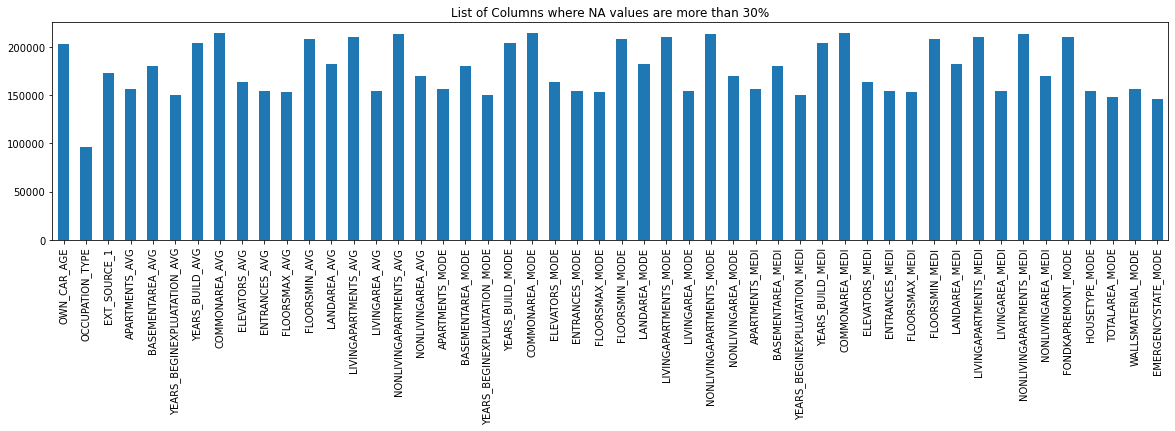

In [9]:
Null_col = Application_df.isnull().sum()
Null_col = Null_col[Null_col.values >(0.3*len(Application_df))]
print('Number of columns having null value more than 30%=',len(Null_col))
plt.figure(figsize=(20,4))
Null_col.plot(kind='bar')
plt.title('List of Columns where NA values are more than 30%')
plt.show()



## Remove columns where NA values are more than or equal to 30%

In [10]:
# Removing those 50 columns
Null_col = list(Null_col[Null_col.values>=0.3].index)
Application_df.drop(labels=Null_col,axis=1,inplace=True)


In [11]:
Application_df.isnull().sum()/len(Application_df)*100


SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [12]:
Application_df.shape 

(307511, 72)

### Remove columns where number of unique value is only 1 because that will not make any sense in the analysis

In [13]:
Unique_val=Application_df.nunique()
Unique_val = Unique_val[Unique_val.values == 1]
len(Unique_val)

0

- It is clearly seen that no such column is present in dataframe which satisfy above condition so we good to go

### Columns which are not important in case study 

In [14]:
Cols_NotRequired=['REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
Application_df=Application_df.drop(labels = Cols_NotRequired, axis =1)
print("Left with",Application_df.shape ,"rows & columns.")



Left with (307511, 36) rows & columns.


In [15]:
Application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,1,1,0,1.0,2,2,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,1,1,1,0,2.0,1,1,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,1,1,0,1.0,2,2,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,1,0,0,2.0,2,2,Business Entity Type 3,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,1,0,0,1.0,2,2,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Percentage count of null value after cleaning
(Application_df.isna().sum()*100)/Application_df.shape[0]  

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
FLAG_MOBIL                      0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

## Now we can left with very few discrepency in data so its time to start with data analysis part

In [17]:
Application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [18]:
# Firstly starts with Target variable(1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

Application_df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [19]:
# Percentage of default rate
round(np.mean(Application_df.TARGET),2)*100

8.0

- The default rate is 8%

In [20]:
# To check all categorial variables and null values init.
All_categorial_variables=Application_df.select_dtypes(include='object')
(All_categorial_variables.isna().sum()*100)/All_categorial_variables.shape[0]

NAME_CONTRACT_TYPE     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
NAME_TYPE_SUITE        0.420148
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
ORGANIZATION_TYPE      0.000000
dtype: float64

In [21]:
# To counts of all unique values in dataframe
col=list(All_categorial_variables.columns)
for i in range(0,10):
    print(All_categorial_variables[col[i]].value_counts())
    print('\n')

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64


F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64


N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64


Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64


Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Nam

CODE_GENDER has unwanted values'XNA' so, first replace XNA. Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as it will create no impact on the dataset.

In [22]:
# Removing 'XNA' with F 
Application_df.loc[Application_df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
Application_df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [23]:
# # Column ORGANIZATION_TYPE also contains XNA values so change that too.
Application_df.loc[Application_df['ORGANIZATION_TYPE']=='XNA', 'ORGANIZATION_TYPE']=np.NAN


In [24]:
round((All_categorial_variables.isna().sum()*100)/All_categorial_variables.shape[0],2)*100

NAME_CONTRACT_TYPE      0.0
CODE_GENDER             0.0
FLAG_OWN_CAR            0.0
FLAG_OWN_REALTY         0.0
NAME_TYPE_SUITE        42.0
NAME_INCOME_TYPE        0.0
NAME_EDUCATION_TYPE     0.0
NAME_FAMILY_STATUS      0.0
NAME_HOUSING_TYPE       0.0
ORGANIZATION_TYPE       0.0
dtype: float64

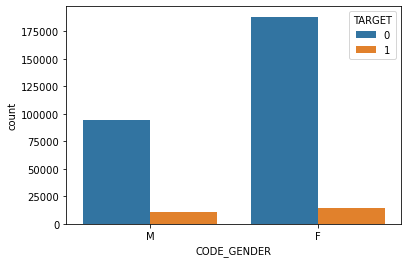

In [25]:
sns.countplot(data=Application_df, x='CODE_GENDER', hue='TARGET')
plt.show()

- Female Clients are slightly more in defaulter category than Male clients

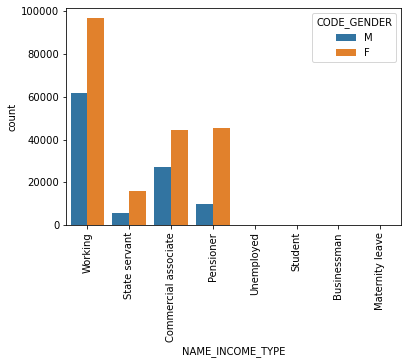

In [26]:
# Plotting for Income type
plt.xticks(rotation='vertical')
sns.countplot(data=Application_df,x='NAME_INCOME_TYPE',hue='CODE_GENDER')
plt.show()

Points to be concluded from the above graph.

- For income type 'working', 'commercial associate', and 'pensioner' the number of credits are higher than others.
- For this Females are having more number of credits than male.
- No credits status for income type 'student', 'Businessman' and 'Maternity leave'.

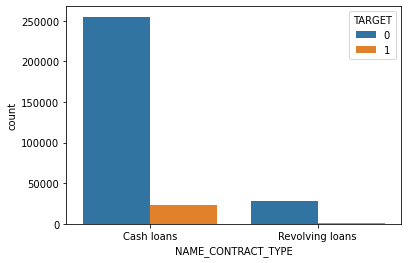

In [27]:
sns.countplot(data=Application_df, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.show()

Points to be concluded:
- Less number of defaulters are in revolving loans as compared to cash loans

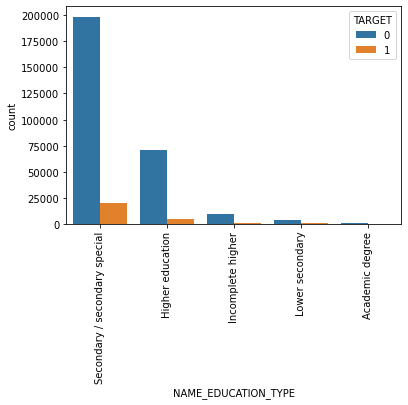

In [28]:
plt.xticks(rotation='vertical')
sns.countplot(data=Application_df, x='NAME_EDUCATION_TYPE', hue='TARGET')
plt.show()

- From above plot it is true that Secondary education and higher education has more positive response but their negative reponses in default are also high as compared to others

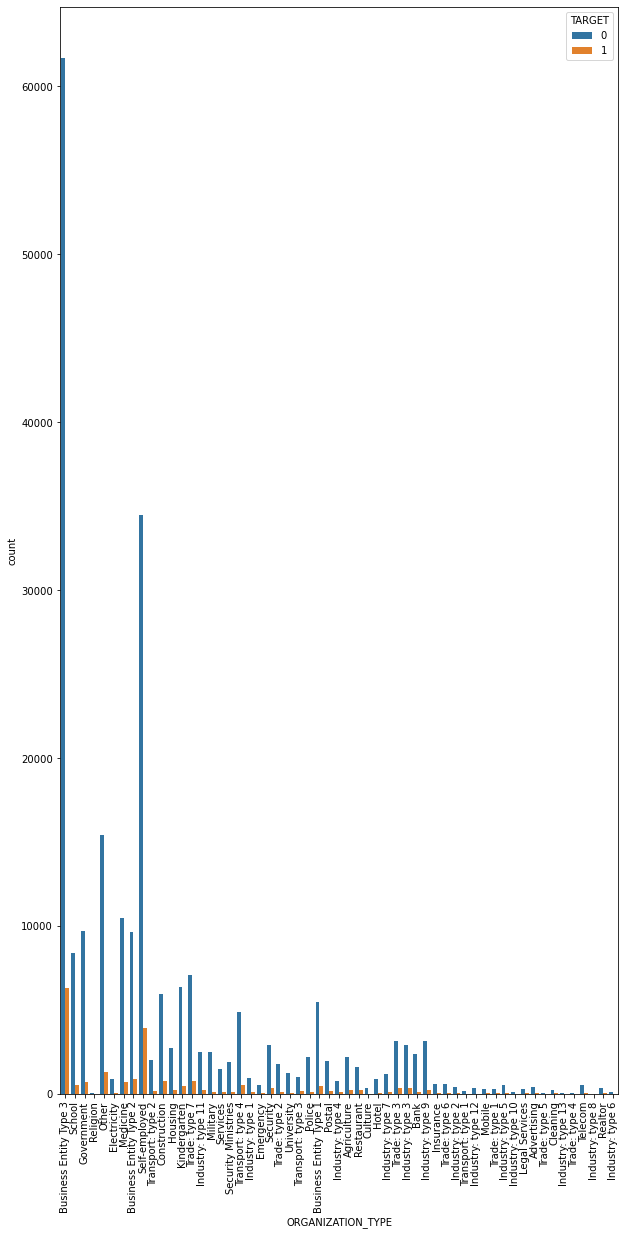

In [29]:
plt.figure(figsize=(10,20))
plt.xticks(rotation=90)
sns.countplot(data=Application_df, x='ORGANIZATION_TYPE', hue='TARGET')
plt.show()

1.Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.
2.Less clients are from Industry: type 8,type 6, type 10, religion and trade type 5, type 4.


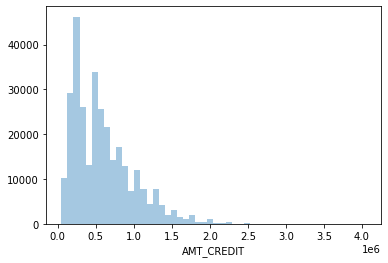

In [30]:
sns.distplot(Application_df['AMT_CREDIT'],kde=False)
plt.show()

### Let's bin the Credit amount variable into small, medium, high, very high.

In [31]:
def Credit_amount(n):
    if n < 100000:
        return 'Low'
    elif n >=100000 and n < 200000:
        return 'Medium'
    elif n >= 200000 and n < 400000:
        return 'High'
    else:
        return 'Very High'
        
Application_df['AMT_CREDIT_LIMIT'] = Application_df['AMT_CREDIT'].apply(lambda x: Credit_amount(x))

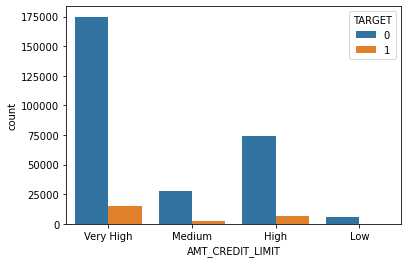

In [32]:
sns.countplot(data=Application_df, x='AMT_CREDIT_LIMIT', hue='TARGET')

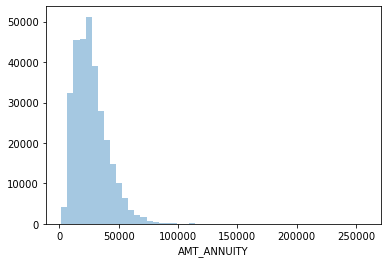

In [33]:
sns.distplot(Application_df['AMT_ANNUITY'],kde=False)
plt.show()

### Let's bin the Annuity amount variable into low, medium and high

In [34]:
def annual_rate(n):
    if n <= 10000:
        return 'low'
    elif n > 10000 and n <=15000:
        return 'medium'
    else:
        return 'high'
    
    
Application_df['AMT_ANNUITY_LIMIT'] = Application_df['AMT_ANNUITY'].apply(lambda x: annual_rate(x))

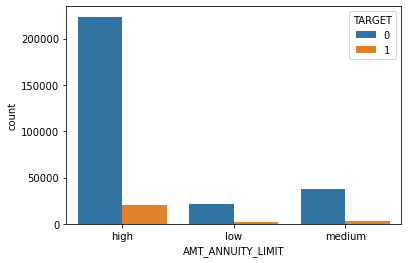

In [35]:
sns.countplot(data=Application_df, x='AMT_ANNUITY_LIMIT', hue='TARGET')

## plotting the correlation with heat map as it is the best choice to visulaize

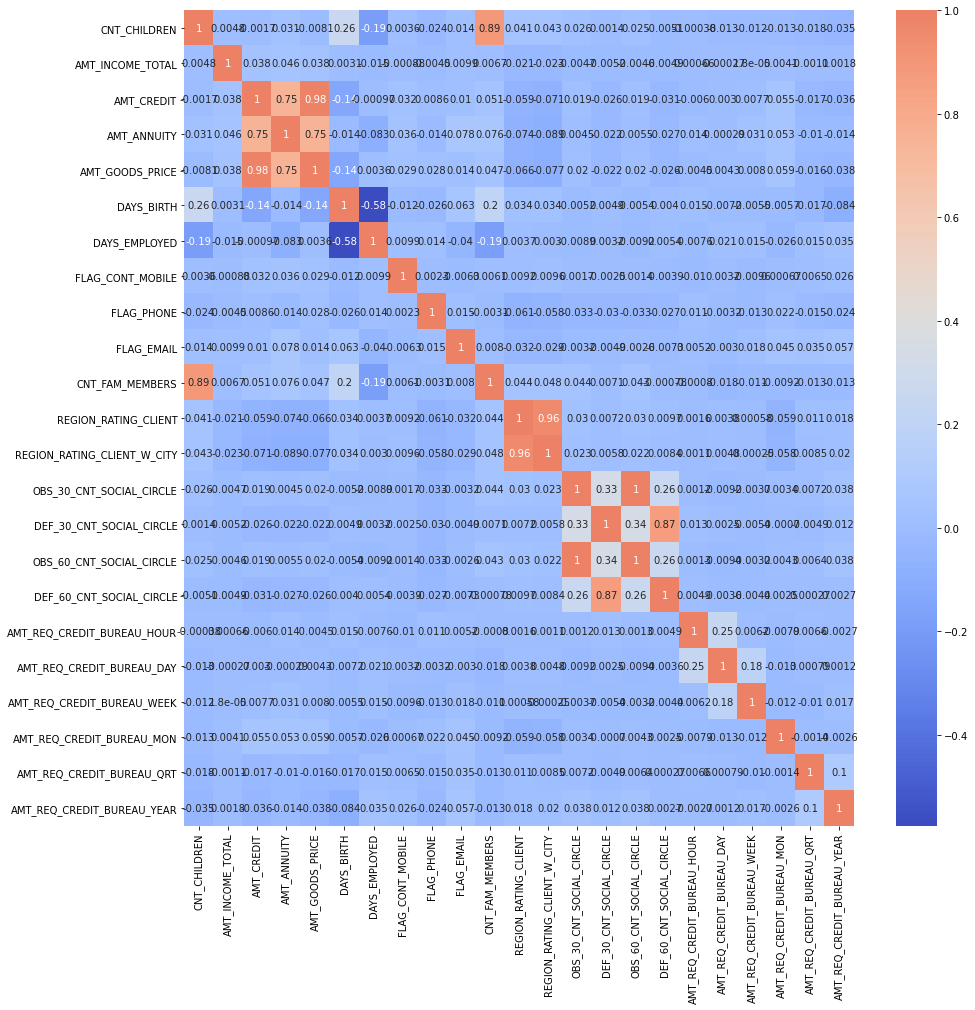

In [36]:
# Correlation for target 1
target_df1=Application_df[Application_df['TARGET']==1]
target_df1=target_df1.iloc[0:,2:]
target_df1.drop(['FLAG_MOBIL'], axis=1, inplace=True)
target_df_num1=target_df1.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,15))
sns.heatmap(target_df_num1.corr(),annot=True,cmap="coolwarm", center = 0.4)


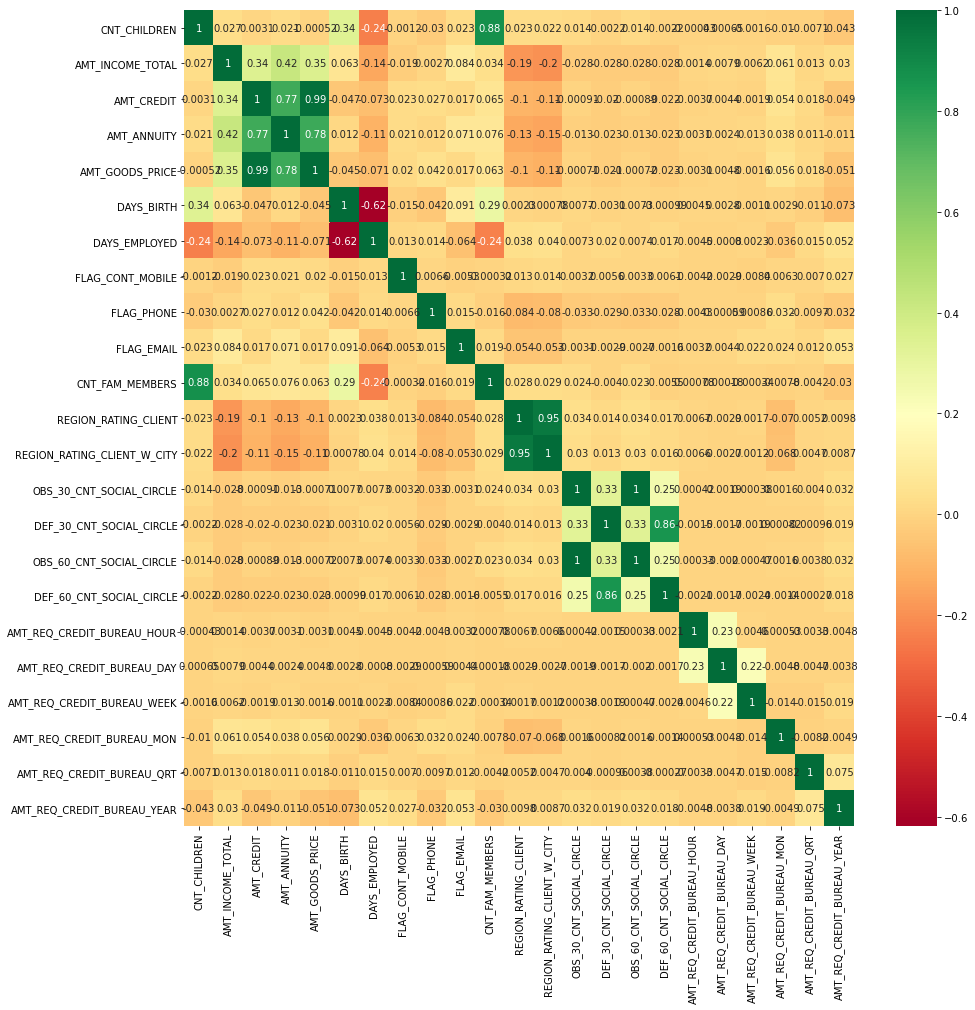

In [37]:
# Correlation for target 0
target_df2=Application_df[Application_df['TARGET']==0]
target_df2=target_df2.iloc[0:,2:]
target_df2.drop(['FLAG_MOBIL'], axis=1, inplace=True)
target_df_num2=target_df2.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(15,15))
sns.heatmap(target_df_num2.corr(),annot=True,cmap='RdYlGn', center=0.2)
plt.show()

In [38]:
# Correlation for target 1
target_df_num1.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008112,0.259109,-0.191942,0.003592,-0.024306,0.013902,0.885484,0.040680,0.043185,0.025804,0.001448,0.025180,-0.005106,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037583,0.003096,-0.014979,-0.000878,-0.004478,0.009889,0.006654,-0.021486,-0.022808,-0.004709,-0.005186,-0.004616,-0.004866,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.983103,-0.135316,-0.000968,0.031771,0.008608,0.010157,0.051224,-0.059193,-0.071377,0.019098,-0.025979,0.019487,-0.030880,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752699,-0.014303,-0.082552,0.035656,-0.013768,0.078188,0.075711,-0.073784,-0.089291,0.004463,-0.022394,0.005500,-0.027495,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841
AMT_GOODS_PRICE,-0.008112,0.037583,0.983103,0.752699,1.000000,-0.135810,0.003587,0.028657,0.027678,0.013697,0.047388,-0.066390,-0.077191,0.019921,-0.021783,0.020385,-0.026179,-0.004496,0.004280,0.007980,0.058558,-0.016024,-0.037848
DAYS_BIRTH,0.259109,0.003096,-0.135316,-0.014303,-0.135810,1.000000,-0.575097,-0.011826,-0.026257,0.062543,0.203267,0.033928,0.033631,-0.005164,0.004946,-0.005391,0.004001,0.014654,-0.007248,-0.005537,-0.005713,-0.017214,-0.084192
DAYS_EMPLOYED,-0.191942,-0.014979,-0.000968,-0.082552,0.003587,-0.575097,1.000000,0.009894,0.013789,-0.040055,-0.186561,0.003679,0.002992,-0.008866,0.003205,-0.009151,0.005399,-0.007632,0.021363,0.014720,-0.025738,0.014982,0.035150
FLAG_CONT_MOBILE,0.003592,-0.000878,0.031771,0.035656,0.028657,-0.011826,0.009894,1.000000,0.002253,-0.006251,0.006129,0.009213,0.009599,0.001724,-0.002497,0.001406,-0.003942,-0.010184,0.003201,-0.009617,0.000668,0.006452,0.026164
FLAG_PHONE,-0.024306,-0.004478,0.008608,-0.013768,0.027678,-0.026257,0.013789,0.002253,1.000000,0.014924,-0.003081,-0.060508,-0.057872,-0.032646,-0.029599,-0.032588,-0.026839,0.010581,-0.003152,-0.013314,0.021569,-0.015164,-0.023534
FLAG_EMAIL,0.013902,0.009889,0.010157,0.078188,0.013697,0.062543,-0.040055,-0.006251,0.014924,1.000000,0.007951,-0.032124,-0.028632,-0.003243,-0.004918,-0.002648,-0.007292,0.005185,-0.002951,0.018131,0.044984,0.035230,0.056624


In [39]:
# Correlation for target 0
target_df2.corr()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.000525,0.336966,-0.243356,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.349462,0.062609,-0.141250,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.987250,-0.047378,-0.072515,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.776686,0.012263,-0.106425,0.021397,0.012231,0.071270,0.075787,-0.132128,-0.145153,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000525,0.349462,0.987250,0.776686,1.000000,-0.044565,-0.071051,0.020185,0.042255,0.017249,0.062814,-0.104382,-0.112601,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
DAYS_BIRTH,0.336966,0.062609,-0.047378,0.012263,-0.044565,1.000000,-0.618048,-0.015328,-0.041835,0.090793,0.285825,0.002332,0.000780,0.007726,-0.003057,0.007316,-0.000990,0.004461,0.002772,-0.001069,0.002855,-0.011335,-0.072886
DAYS_EMPLOYED,-0.243356,-0.141250,-0.072515,-0.106425,-0.071051,-0.618048,1.000000,0.012994,0.014279,-0.063922,-0.237413,0.037851,0.040028,0.007252,0.019579,0.007431,0.016635,-0.004497,-0.000802,0.002304,-0.035564,0.015288,0.052148
FLAG_CONT_MOBILE,-0.001201,-0.018814,0.023096,0.021397,0.020185,-0.015328,0.012994,1.000000,0.006599,-0.005278,-0.000322,0.013371,0.014003,0.003161,0.005562,0.003266,0.006141,-0.004154,-0.002916,-0.008410,0.006277,0.006974,0.026731
FLAG_PHONE,-0.029929,0.002683,0.026725,0.012231,0.042255,-0.041835,0.014279,0.006599,1.000000,0.014595,-0.016271,-0.084433,-0.079523,-0.033330,-0.029007,-0.033276,-0.027862,-0.004347,-0.000587,0.000861,0.032387,-0.009701,-0.031769
FLAG_EMAIL,0.023460,0.083705,0.017074,0.071270,0.017249,0.090793,-0.063922,-0.005278,0.014595,1.000000,0.019024,-0.053767,-0.052677,-0.003054,-0.002941,-0.002704,-0.001628,0.003238,0.004396,0.021868,0.024413,0.011990,0.053089


In [40]:
Application_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.0,238500.0,450000.0,679500.0,4050000.0
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
FLAG_MOBIL,307511.0,0.999997,0.001803,0.0,1.0,1.0,1.0,1.0


### Finding outliers 

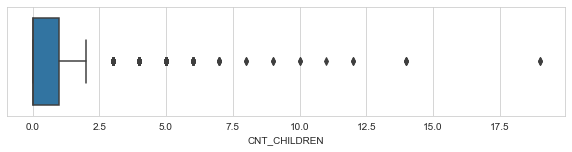

In [46]:
# Outliers on CNT_CHILDREN
plt.figure(figsize=(10,2))
sns.set_style("whitegrid")
sns.boxplot(Application_df.CNT_CHILDREN)
plt.show()

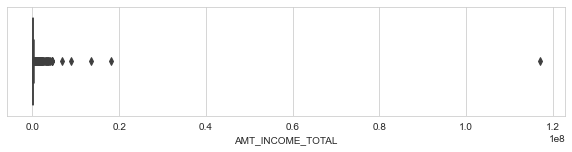

In [49]:
# Outliers on AMT_INCOME_TOTAL
plt.figure(figsize=(10,2))
sns.set_style("whitegrid")
sns.boxplot(Application_df.AMT_INCOME_TOTAL)
plt.show()

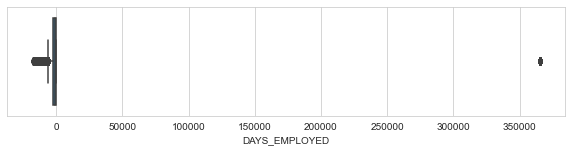

In [56]:
# Outliers on DAYS_EMPLOYED

plt.figure(figsize=(10,2))
sns.set_style("whitegrid")
sns.boxplot(Application_df.DAYS_EMPLOYED)
plt.show()
 

In [57]:
Prev_df= pd.read_csv(r'C:\Users\Jaikrish\Documents\Python Scripts\EDA\credit\previous_application.csv')

In [58]:
Prev_df.shape # To Return shape (Rows, columns) of dataframe

(1048575, 37)

In [59]:
Prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
Prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

In [61]:
#Looking at all the Column names
Prev_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [62]:
Prev_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [63]:
Prev_df.describe(include = 'all').transpose() # To get a summary of all the columns when the dataframe has mixed column types

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1.04858e+06,NaN,NaN,NaN,1.92278e+06,532937,1e+06,1.46064e+06,1.92342e+06,2.38445e+06,2.84538e+06
SK_ID_CURR,1.04858e+06,NaN,NaN,NaN,278437,102857,100001,189386,278810,367744,456255
NAME_CONTRACT_TYPE,1048575,4,Cash loans,465861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_ANNUITY,815566,NaN,NaN,NaN,15891.3,14745.6,0,6301.35,11250,20523,418058
AMT_APPLICATION,1.04858e+06,NaN,NaN,NaN,174270,291079,0,18900,70816.5,180000,6.90516e+06
AMT_CREDIT,1.04858e+06,NaN,NaN,NaN,195000,316941,0,24277.5,80253,215240,6.90516e+06
AMT_DOWN_PAYMENT,489179,NaN,NaN,NaN,6700.78,20785.7,-0.9,0,1624.5,7749,2.1501e+06
AMT_GOODS_PRICE,807610,NaN,NaN,NaN,226289,313449,0,50580,111512,229500,6.90516e+06
WEEKDAY_APPR_PROCESS_START,1048575,7,TUESDAY,160290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HOUR_APPR_PROCESS_START,1.04858e+06,NaN,NaN,NaN,12.4849,3.33314,0,10,12,15,23


In [64]:
Prev_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     233009
AMT_APPLICATION                      0
AMT_CREDIT                           0
AMT_DOWN_PAYMENT                559396
AMT_GOODS_PRICE                 240965
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               559396
RATE_INTEREST_PRIMARY          1044854
RATE_INTEREST_PRIVILEGED       1044854
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 515140
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [65]:
# The percentage of missing values
round((Prev_df.isna().sum()*100)/Prev_df.shape[0], 2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.22
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.35
AMT_GOODS_PRICE                22.98
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.35
RATE_INTEREST_PRIMARY          99.65
RATE_INTEREST_PRIVILEGED       99.65
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.13
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

Number of columns having null value more than 30%= 11


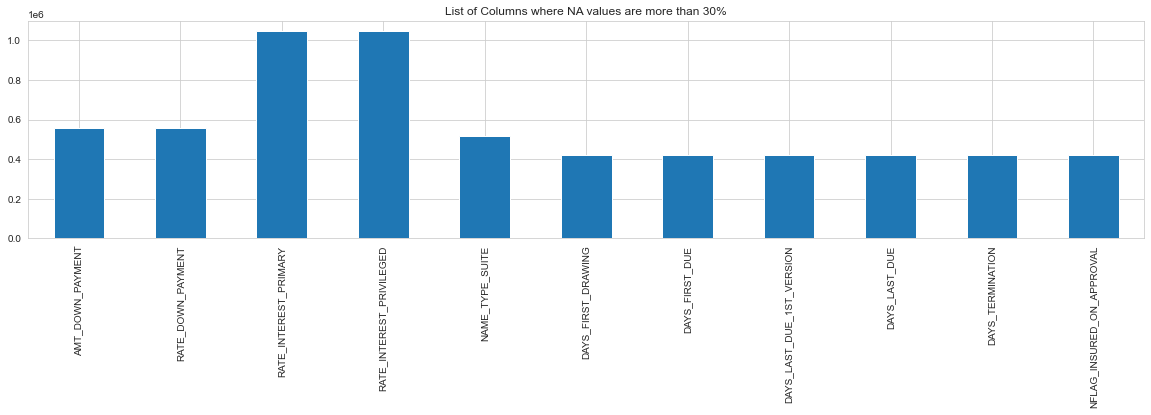

In [66]:
Empty_col = Prev_df.isnull().sum()
Empty_col = Empty_col[Empty_col.values >(0.3*len(Prev_df))]
print('Number of columns having null value more than 30%=',len(Empty_col))
plt.figure(figsize=(20,4))
Empty_col.plot(kind='bar')
plt.title('List of Columns where NA values are more than 30%')
plt.show()


In [67]:
# Removing those 11 columns
Empty_col = list(Empty_col[Empty_col.values>=0.3].index)
Prev_df.drop(labels=Empty_col,axis=1,inplace=True)

In [68]:
Prev_df.isnull().sum()/len(Prev_df)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.221491
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                22.980235
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.221205
NAME_YIELD_GROUP

In [69]:
Cols_NotRequired=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE']
Prev_df=Prev_df.drop(labels = Cols_NotRequired, axis =1)
print("Left with",Prev_df.shape ,"rows & columns.")

Left with (1048575, 23) rows & columns.


In [70]:
Prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,Y,1,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,Y,1,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,Y,1,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,Y,1,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Y,1,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [71]:
Prev_df.describe(include = 'all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1.048575e+06,1.048575e+06,1048575,815566.000000,1.048575e+06,1.048575e+06,8.076100e+05,1048575,1.048575e+06,1048575,1.048575e+06,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1.048575e+06,1048575,815569.000000,1048575,1048351
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,2,NaN,4,NaN,4,9,4,28,5,3,8,NaN,11,NaN,5,17
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,Y,NaN,Approved,NaN,Cash through the bank,XAP,Repeater,XNA,POS,XNA,Credit and cash offices,NaN,XNA,NaN,XNA,Cash
freq,NaN,NaN,465861,NaN,NaN,NaN,NaN,1043203,NaN,652486,NaN,650604,849712,771957,593690,436846,670131,451047,NaN,533625,NaN,323941,178352
mean,1.922775e+06,2.784367e+05,NaN,15891.265151,1.742698e+05,1.950000e+05,2.262892e+05,NaN,9.964123e-01,NaN,-8.820381e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.183904e+02,NaN,15.995639,NaN,NaN
std,5.329366e+05,1.028569e+05,NaN,14745.557438,2.910789e+05,3.169407e+05,3.134490e+05,NaN,5.979011e-02,NaN,7.792649e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.996734e+03,NaN,14.508109,NaN,NaN
min,1.000001e+06,1.000010e+05,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,-2.922000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,0.000000,NaN,NaN
25%,1.460642e+06,1.893860e+05,NaN,6301.350000,1.890000e+04,2.427750e+04,5.058000e+04,NaN,1.000000e+00,NaN,-1.303000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,6.000000,NaN,NaN
50%,1.923419e+06,2.788100e+05,NaN,11250.000000,7.081650e+04,8.025300e+04,1.115116e+05,NaN,1.000000e+00,NaN,-5.830000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+00,NaN,12.000000,NaN,NaN
75%,2.384448e+06,3.677445e+05,NaN,20523.003750,1.800000e+05,2.152395e+05,2.295000e+05,NaN,1.000000e+00,NaN,-2.810000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.500000e+01,NaN,24.000000,NaN,NaN


In [72]:
# To check all categorial variables and null values init.
Prev_df_categorial_variables=Prev_df.select_dtypes(include='object')
(Prev_df_categorial_variables.isna().sum()*100)/Prev_df_categorial_variables.shape[0]

NAME_CONTRACT_TYPE             0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NAME_CONTRACT_STATUS           0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.021362
dtype: float64

In [73]:
# To counts of all unique values in dataframe
col=list(Prev_df_categorial_variables.columns)
for i in range(0,10):
    print(Prev_df_categorial_variables[col[i]].value_counts())
    print('\n')

Cash loans         465861
Consumer loans     461049
Revolving loans    121441
XNA                   224
Name: NAME_CONTRACT_TYPE, dtype: int64


Y    1043203
N       5372
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64


Approved        652486
Canceled        197231
Refused         182083
Unused offer     16775
Name: NAME_CONTRACT_STATUS, dtype: int64


Cash through the bank                        650604
XNA                                          392061
Non-cash from your account                     5233
Cashless from the account of the employer       677
Name: NAME_PAYMENT_TYPE, dtype: int64


XAP       849712
HC        109441
LIMIT      35248
SCO        23472
CLIENT     16775
SCOFR       7968
XNA         3302
VERIF       2192
SYSTEM       465
Name: CODE_REJECT_REASON, dtype: int64


Repeater     771957
New          189990
Refreshed     85411
XNA            1217
Name: NAME_CLIENT_TYPE, dtype: int64


XNA                         593690
Mobile                      141737
Consumer Elec

In [74]:
Merge_df = pd.merge(Application_df, Prev_df, how='left', on=['SK_ID_CURR'])

In [75]:
Merge_df.shape

(932527, 60)

In [76]:
Merge_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_LIMIT', 'AMT_ANNUITY_LIMIT',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDI

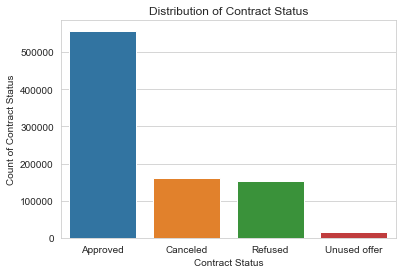

In [77]:
sns.countplot(Merge_df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [78]:
approved=Merge_df[Merge_df.NAME_CONTRACT_STATUS=='Approved']
refused=Merge_df[Merge_df.NAME_CONTRACT_STATUS=='Refused']
canceled=Merge_df[Merge_df.NAME_CONTRACT_STATUS=='Canceled']
unused=Merge_df[Merge_df.NAME_CONTRACT_STATUS=='Unused Offer']

In [79]:
def plt_func(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

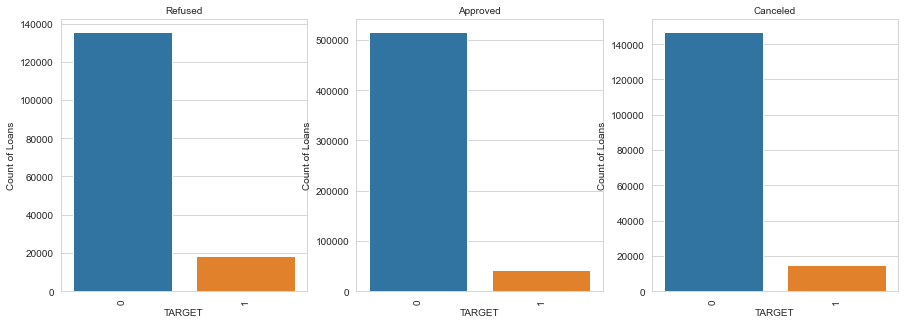

In [80]:
plt_func('TARGET')

In [81]:
refused.TARGET.value_counts(normalize=True)

0    0.880001
1    0.119999
Name: TARGET, dtype: float64

In [82]:
approved.TARGET.value_counts(normalize=True)

0    0.924107
1    0.075893
Name: TARGET, dtype: float64

In [83]:
canceled.TARGET.value_counts(normalize=True)

0    0.908246
1    0.091754
Name: TARGET, dtype: float64

In [84]:
def plt_func1(var):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    
    s1=sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=approved)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=refused)
    s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=cancelled)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

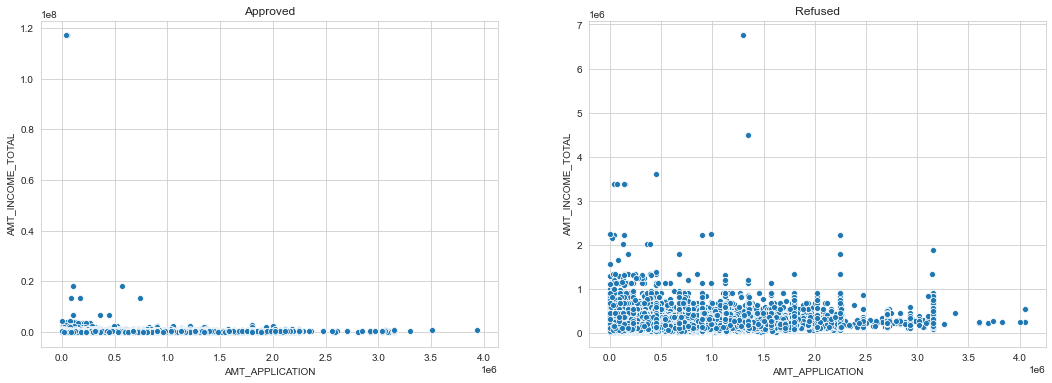

In [85]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=approved)
plt.title('Approved')

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_APPLICATION',y='AMT_INCOME_TOTAL',data=refused)
plt.title('Refused')
plt.show()

In [93]:
Merge_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_LIMIT', 'AMT_ANNUITY_LIMIT',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y',
       'AMT_APPLICATION', 'AMT_CREDI

In [97]:
Merge_df_sub=Merge_df[['TARGET','AMT_INCOME_TOTAL','AMT_APPLICATION','AMT_CREDIT_x','DAYS_BIRTH','DAYS_EMPLOYED']]

In [98]:
Merge_df_sub_sample = Merge_df_sub.dropna().sample(5000)

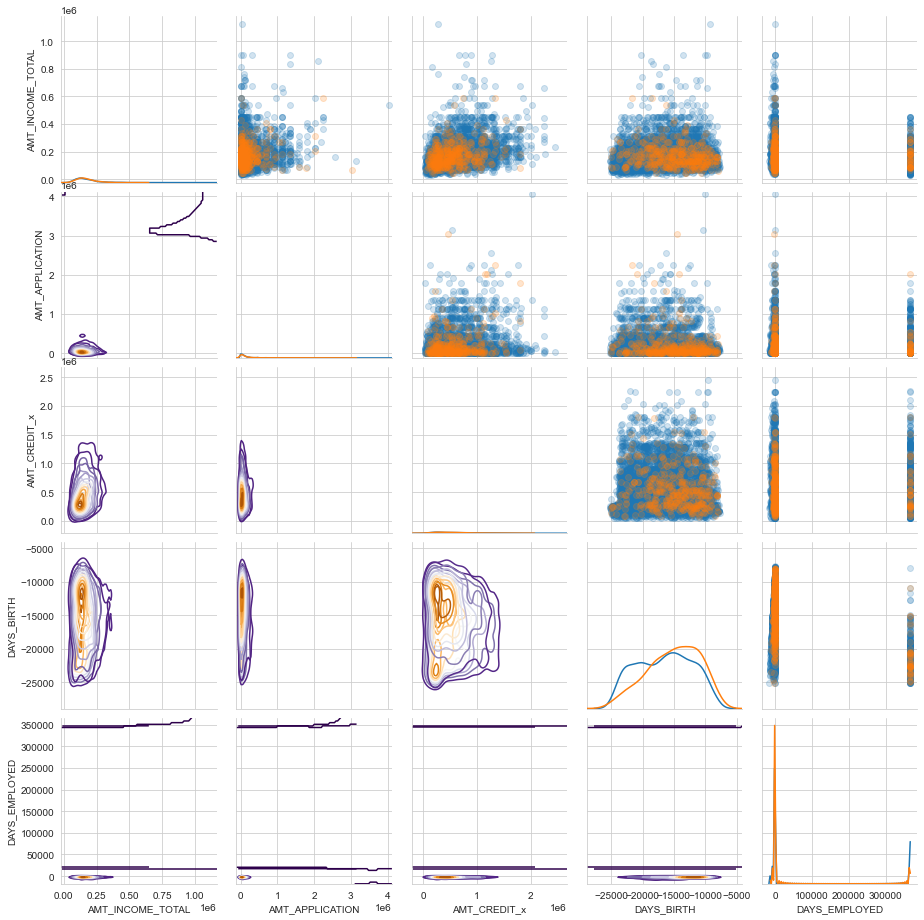

In [101]:
grid = sns.PairGrid(data = Merge_df_sub_sample, diag_sharey=True,
                    hue = 'TARGET', 
                    vars = [x for x in list(Merge_df_sub_sample.columns) if x != 'TARGET'])

grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.PuOr_r);